<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme()
plt.style.use('ggplot')
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(12,8)

In [4]:
cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [5]:
# ANSWER 2

cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
y = pd.Series([0 if i=='B' else 1 for i in cancer.diagnosis])

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int64

### 4. What is the baseline accuracy?

In [17]:
# ANSWER

1 - y.mean()

0.6274165202108963

### 5. Choose features to be your predictor variables and set up your X.

In [7]:
# ANSWER

chosen_features = ['concave points_worst','radius_worst','perimeter_worst','area_worst',\
                            'texture_worst','compactness_mean','smoothness_worst','symmetry_worst']

X = cancer[chosen_features]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [18]:
# ANSWER

# Make an instance of a KNeighborsClassifier object with 1 neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
# use KNearest Classifier for prediction
knn.fit(X,y)


1.0

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [19]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values
knn.score(X,y)

1.0

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [22]:
# ANSWER

from sklearn.model_selection import train_test_split
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
# STEP 2: train the model on the training set (using K=1)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# STEP 3: test the model on the testing set, and check the accuracy

knn.score(X_test, y_test)

0.8713450292397661

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [26]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn = KNeighborsClassifier(n_neighbors= X_train.shape[0])
# Fit Train Data
knn.fit(X_train, y_train)
# Print accuracy_score

print(f"The accuracy score is {knn.score(X_train, y_train)}")

The accuracy score is 0.6256281407035176


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [32]:
# ANSWER
# plot test accuracy by number of neighbors:

acc = []
for i in range(1,X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    cast = {'K_value': i, 'Accuracy': knn.score(X_train, y_train)}
    acc.append(cast)
score_table = pd.DataFrame(data=acc, columns=['K_value', 'Accuracy'])

In [33]:
score_table

,K_value,Accuracy
0,1,1.000000
1,2,0.959799
2,3,0.959799
3,4,0.939698
4,5,0.942211
...,...,...
393,394,0.625628
394,395,0.625628
395,396,0.625628
396,397,0.625628


<AxesSubplot:xlabel='K_value', ylabel='Accuracy'>

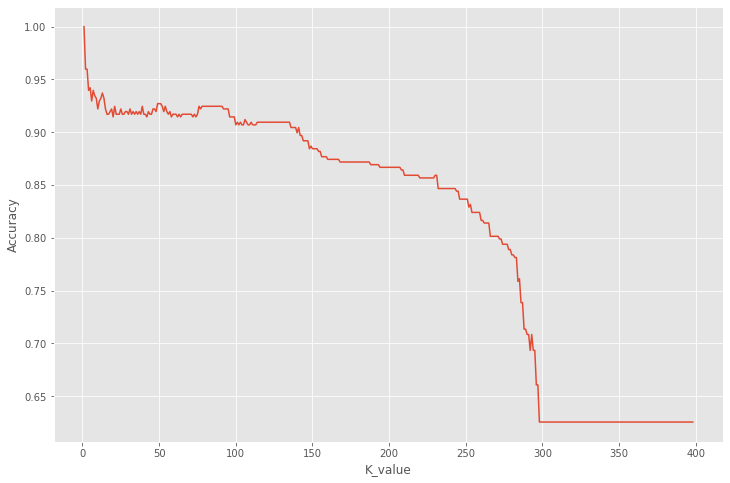

In [34]:
sns.lineplot(data=score_table, x='K_value', y='Accuracy')

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [57]:
# ANSWER
from sklearn.model_selection import cross_val_score

# ANSWER
# plot test accuracy by number of neighbors:

acc = []
for i in range(1,310):
    knn = KNeighborsClassifier(n_neighbors= i)
    score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv=5)
    score_summary = sum(score)/len(score)
    cast = {'K_value': i, 'Accuracy': score_summary}
    acc.append(cast)
score_table = pd.DataFrame(data=acc, columns=['K_value', 'Accuracy'])


In [58]:
score_table

,K_value,Accuracy
0,1,0.922152
1,2,0.909525
2,3,0.922184
3,4,0.917120
4,5,0.909589
...,...,...
304,305,0.625633
305,306,0.625633
306,307,0.625633
307,308,0.625633


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [63]:
# ANSWER
# Standarize X

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
score_table['Accuracy_sc'] = sc.fit_transform(score_table[['Accuracy']])

In [72]:
# ANSWER
# plot test accuracy by number of neighbors:

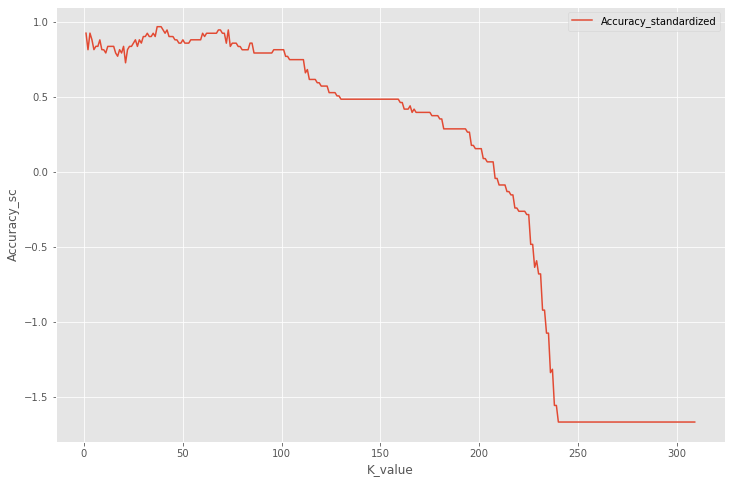

In [71]:
sns.lineplot(data=score_table, x='K_value', y='Accuracy_sc')
plt.legend(['Accuracy_standardized'])
plt.show()

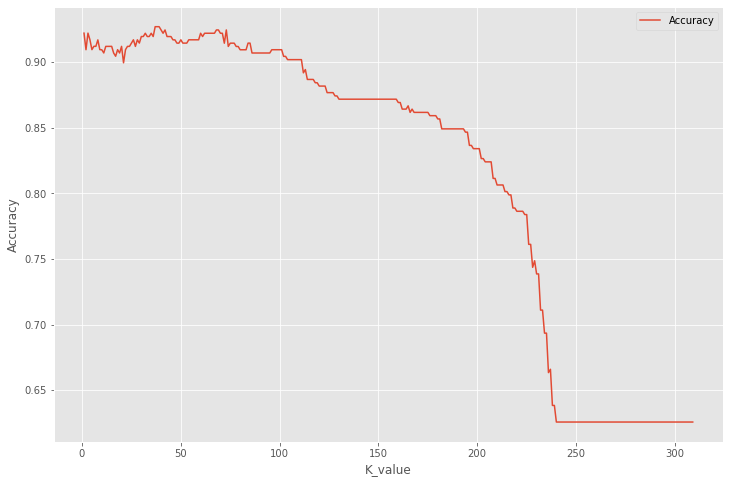

In [70]:
sns.lineplot(data=score_table, x='K_value', y='Accuracy')
plt.legend(['Accuracy'])
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



